### 使用證交所所提供的API進行數據蒐集
ALL API --> https://openapi.twse.com.tw/v1/swagger.json  
上市個股日成交資訊 API --> https://openapi.twse.com.tw/v1/exchangeReport/STOCK_DAY_ALL

### Import libraries

In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

### Get data

In [4]:
# 定義證交所 API 的 URL
url = 'https://openapi.twse.com.tw/v1/exchangeReport/STOCK_DAY_ALL'  
# 發送GET請求
response = requests.get(url)  
if response.status_code == 200:
    print('Request was successful!')
    print('Last modified: ' + response.headers['last-modified'])
else:
    print('Request failed with status code:', response.status_code)

# load data as json format
jsondata = json.loads(response.text)

Request was successful!
Last modified: Fri, 30 Aug 2024 21:00:43 GMT


### 欄位定義

Field        | Type     | Subject
-------------|----------|---------
Code	     |string    |證券代號
Name	     |string    |證券名稱
TradeVolume	 |string    |成交股數
TradeValue	 |string    |成交金額
OpeningPrice |string    |開盤價
HighestPrice |string    |最高價
LowestPrice	 |string    |最低價
ClosingPrice |string    |收盤價
Change	     |string    |漲跌價差
Transaction	 |string    |成交筆數

### 使用 dataframe 清理資料

In [6]:
# 將JSON數據轉換為DataFrame
df = pd.DataFrame(jsondata)
# 將"Code"列設置為索引
df.set_index("Code", inplace=True)
# 將空字符串替換為'0'
df.replace('', '0', inplace=True)
#將除了"Name"列以外的所有列轉換為浮點數
df[df.columns.difference(['Name'])] = df[df.columns.difference(['Name'])].astype(float)

### 按收盤價排序並選取前10大收盤價的股票

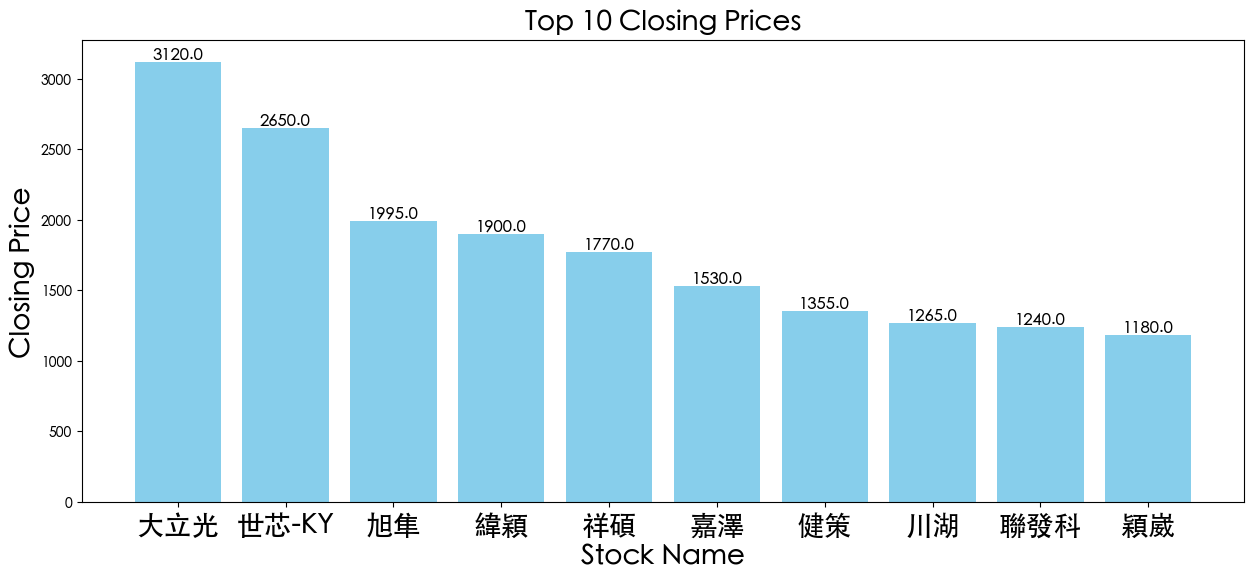

In [11]:
top10_closing = df.nlargest(10, 'ClosingPrice')

# 視覺化
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示ASCII負號, NOT unicode 負號
plt.figure(figsize=(15, 6))
bars = plt.bar(top10_closing['Name'], top10_closing['ClosingPrice'], color='skyblue')
plt.title('Top 10 Closing Prices',fontsize=20)
plt.xlabel('Stock Name',fontsize=20)
plt.ylabel('Closing Price',fontsize=20)
plt.xticks(fontsize=20)
# 在每個條形圖上顯示對應的股價
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)